# Simple Linear Regression

### Build a Simple linear regression model with HR dataset where Salary is the target variable. Also understand the correaltion and RMSE between the Years of Experience and Salary hike obtained.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

In [2]:
# import dataset
hr = pd.read_csv(r"D:\360digi\DS\Sharath\Simple_linearRegression\handson\Datasets_SLR\Salary_Data.csv")
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
hr.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
hr.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
# Split the data into Target and Predictors

In [5]:
X = pd.DataFrame(hr['YearsExperience'])

In [6]:
Y = pd.DataFrame(hr['Salary'])

In [7]:
# Select numeric features for data preprocessing
numeric_features = ['YearsExperience']
numeric_features

['YearsExperience']

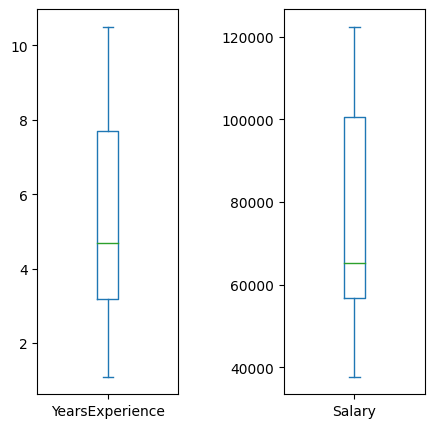

In [8]:
# box plot visualisation
hr.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [9]:
# missing value check
hr.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
# Below steps are not necessary for our dataset but creating a pipeline so we can test the algorithm with new dataset easily.

In [11]:
# Winsorization
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['YearsExperience'])

In [12]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [13]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['YearsExperience']))])

In [14]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['YearsExperience'])])


In [15]:
preprocessor1 = ColumnTransformer(transformers = [('win', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('win',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['YearsExperience']))]),
                                 ['YearsExperience'])])


In [16]:
impute_data = preprocessor.fit(X)

In [17]:
hr['YearsExperience'] = pd.DataFrame(impute_data.transform(X))

In [18]:
X2 = pd.DataFrame(hr['YearsExperience'])

In [19]:
winz_data = preprocessor1.fit(X2)

In [20]:
hr['YearsExperience'] = pd.DataFrame(winz_data.transform(X))

In [21]:
hr.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


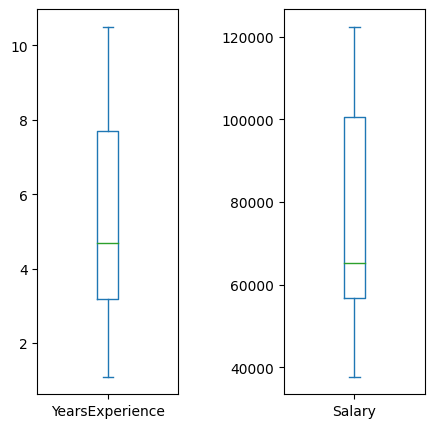

In [22]:
# box plot visualisation
hr.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [23]:
# No outliers

In [24]:
import sweetviz as sv

report = sv.analyze(hr)
report.show_html('EDAreport.html')

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report EDAreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
# Graphical analysis

<BarContainer object of 30 artists>

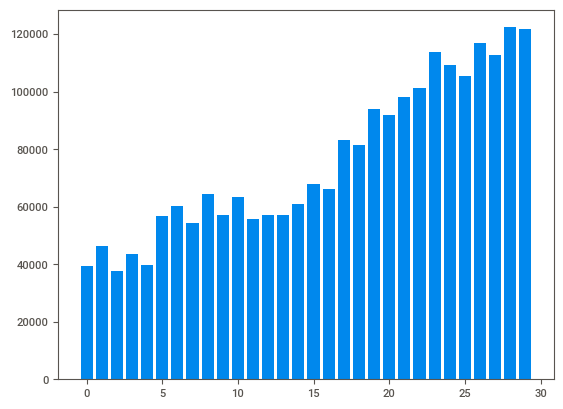

In [27]:
plt.bar(height = hr.Salary, x = np.arange(30))

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

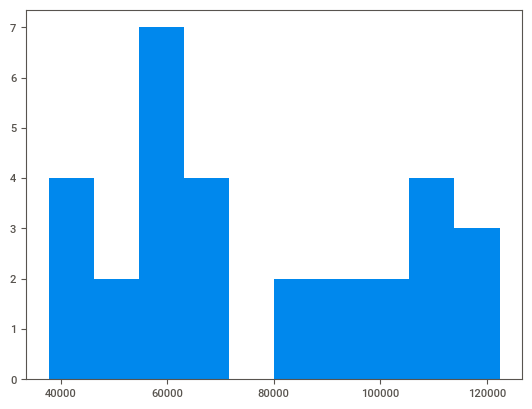

In [28]:
plt.hist(hr.Salary) #histogram

<BarContainer object of 30 artists>

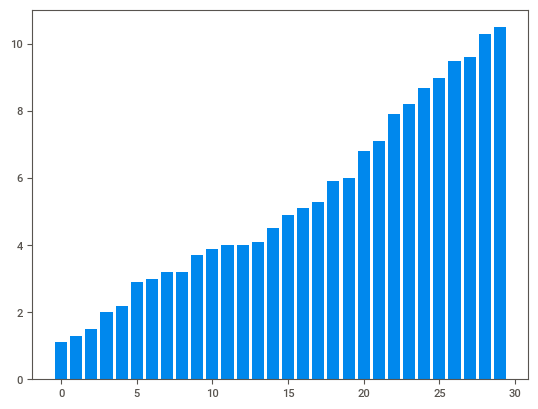

In [29]:
plt.bar(height = hr.YearsExperience, x = np.arange(30))

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

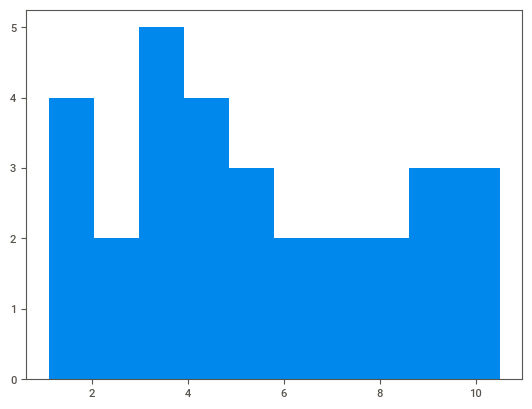

In [30]:
plt.hist(hr.YearsExperience)

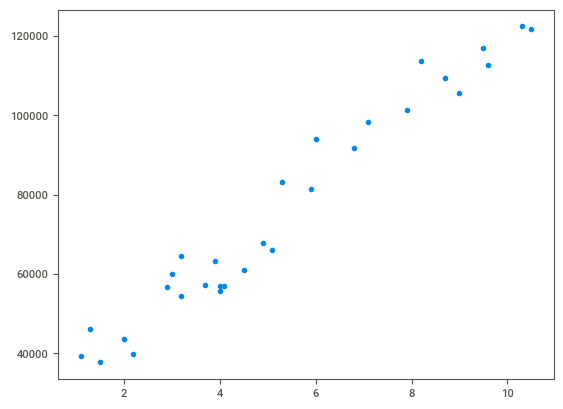

In [31]:
# # Bivariate Analysis
# Scatter plot
plt.scatter(x = hr['YearsExperience'], y = hr['Salary'])

In [32]:
# Shape : linear
# Direction : positive

In [33]:
# Correlation coefficient
np.corrcoef(hr.YearsExperience, hr.Salary)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [34]:
# Covariance
cov_output = np.cov(hr.YearsExperience, hr.Salary)[0,1]
cov_output

76106.30344827585

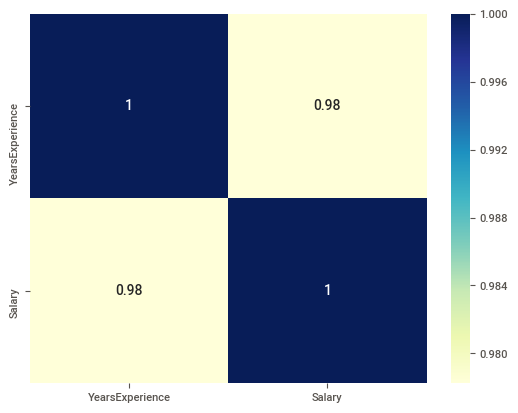

In [35]:
#Heatmap
dataplot = sns.heatmap(hr.corr(), annot = True, cmap = "YlGnBu")

# Regression Techniques

### Simple Linear Regression Y ~ X
### Salary ~ YearsExperience

In [41]:
model = smf.ols('Salary ~ YearsExperience', data = hr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        00:56:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# cal = 2.579e+04 + 9449.9623(YearsExperience)
# R-squared : 0.957  where |r| > 0.85 is considered as strong correlation
# RMSE : 5592.0436

In [43]:
pred1 = model.predict(pd.DataFrame(hr['YearsExperience']))
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [44]:
# Error calculation (error = AV - PV)
res1 = hr.Salary - pred1

print(np.mean(res1))

-1.5036979069312415e-11


In [45]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1


5592.043608760661

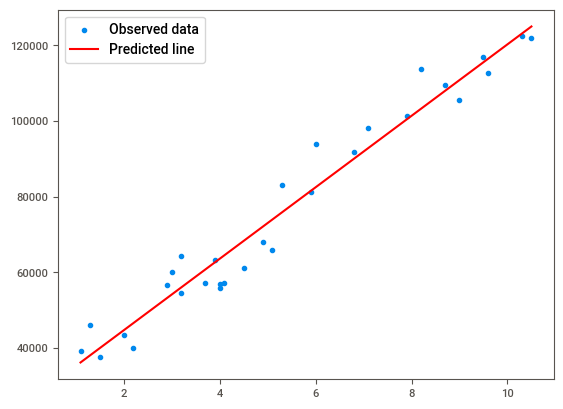

In [46]:
# Regression Line
plt.scatter(hr.YearsExperience, hr.Salary)
plt.plot(hr.YearsExperience, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

# Model Tuning with Transformations

### Log Transformation
### x = log(YearsExperience); y = Salary

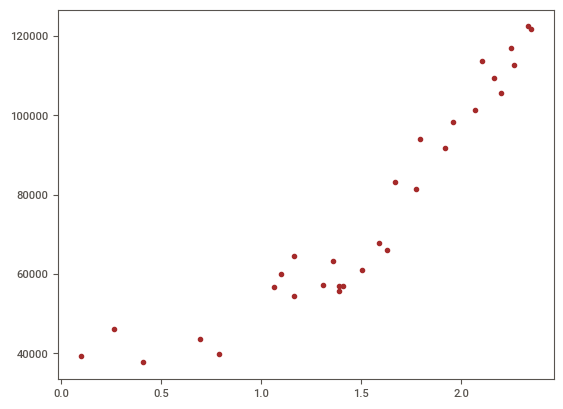

In [47]:
plt.scatter(x = np.log(hr['YearsExperience']), y = hr['Salary'], color = 'brown')

In [48]:
#correlation
np.corrcoef(np.log(hr.YearsExperience), hr.Salary)

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

In [49]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)', data = hr).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        00:56:33   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# cal = 1.493e+04 + 4.058e+04(log(YearsExperience))
# R-squared : 0.854  where |r| > 0.85 is considered as strong correlation
# RMSE : 10302.8937

In [51]:
pred2 = model2.predict(pd.DataFrame(hr['YearsExperience']))

In [52]:
# Error calculation
res2 = hr.Salary - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228308

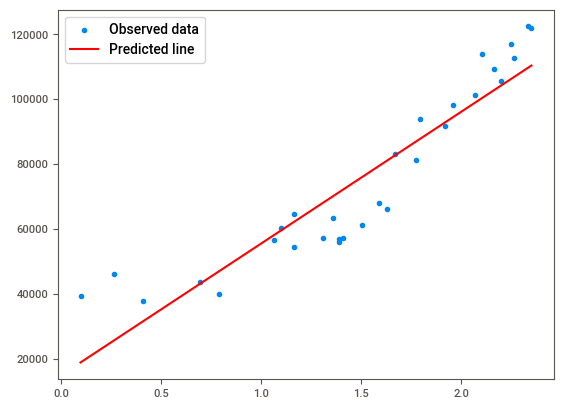

In [53]:
# Regression Line
plt.scatter(np.log(hr.YearsExperience), hr.Salary)
plt.plot(np.log(hr.YearsExperience), pred2, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Exponential transformation
### x = YearsExperience; y = log(Salary)

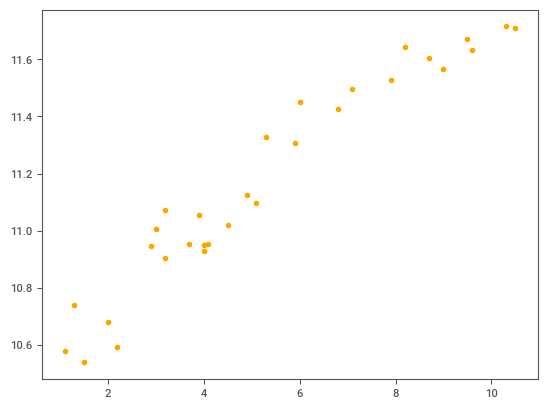

In [54]:
plt.scatter(x = hr['YearsExperience'], y = np.log(hr['Salary']), color = 'orange')

In [55]:
#correlation
np.corrcoef(hr.YearsExperience, np.log(hr.Salary))

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

In [56]:
model3 = smf.ols('np.log(Salary) ~ YearsExperience', data = hr).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        00:56:37   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# log(Salary) = 10.5074 + 0.1255(YearsExperience)
# R-squared : 0.932  where |r| > 0.85 is considered as strong correlation
# RMSE : 7213.2350

In [58]:
pred3 = model3.predict(pd.DataFrame(hr['YearsExperience']))

In [59]:
pred3_at = np.exp(pred3)
print(pred3_at)

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64


In [60]:
res3 = hr.Salary - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.235076620129

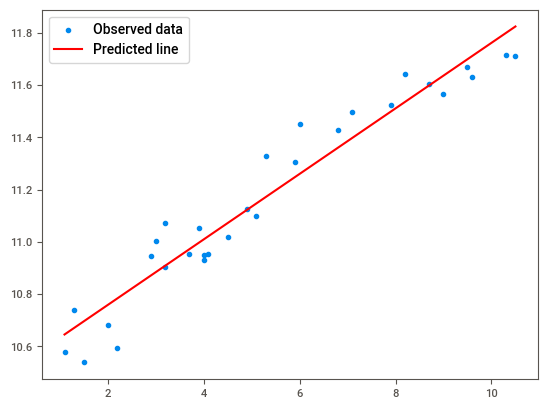

In [61]:
# Regression Line
plt.scatter(hr.YearsExperience, np.log(hr.Salary))
plt.plot(hr.YearsExperience, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Polynomial transformation 
### x = YearsExperience; x^2 = YearsExperience*YearsExperience; y = log(Salary)
### log(y) ~ x + x^2

In [62]:
X = pd.DataFrame(hr['YearsExperience'])

In [63]:
Y = pd.DataFrame(hr['Salary'])

In [64]:
model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = hr).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.95e-18
Time:                        00:56:42   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience                          0.2024      0.027      7.601      0.000       0.148       0.257
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# log(Salary) = 10.3369 + 0.2024(YearsExperience) -0.0066(YearsExperience*YearsExperience)
# R-squared : 0.949  where |r| > 0.85 is considered as strong correlation
# RMSE : 5391.0815

In [66]:
pred4 = model4.predict(pd.DataFrame(hr))
print(pred4)

0     10.551469
1     10.588771
2     10.625544
3     10.715161
4     10.750082
5     10.868138
6     10.884475
7     10.916750
8     10.916750
9     10.995124
10    11.025548
11    11.040561
12    11.040561
13    11.055443
14    11.113645
15    11.169730
16    11.196980
17    11.223700
18    11.300686
19    11.313054
20    11.407237
21    11.440373
22    11.522915
23    11.551686
24    11.596993
25    11.622589
26    11.662605
27    11.670211
28    11.719752
29    11.732716
dtype: float64


In [67]:
pred4_at = np.exp(pred4)
print(pred4_at)

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64


In [68]:
# Error calculation
res4 = hr.Salary - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5391.081582693624

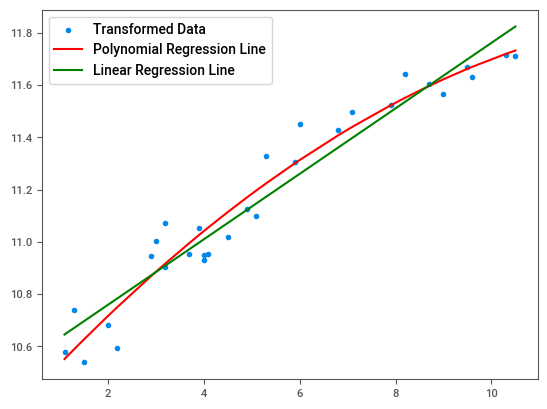

In [69]:
plt.scatter(X['YearsExperience'], np.log(Y['Salary']))
plt.plot(X['YearsExperience'], pred4, color = 'red')
plt.plot(X['YearsExperience'], pred3, color = 'green', label = 'linear')
plt.legend(['Transformed Data', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

## Choose the best model using RMSE

In [70]:
data = {"Model": pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE": pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)

In [71]:
table_rmse

,Model,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,5391.081583


In [ ]:
# The model with low RMSE value is the best model. Polynomial Regression is the best model with :
# log(Salary) = 10.3369 + 0.2024(YearsExperience) -0.0066(YearsExperience*YearsExperience)
# R-squared : 0.949  where |r| > 0.85 is considered as strong correlation
# RMSE : 5391.0815